# Mathematical Underpinnings - Lab 2

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.$$\mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = \mathbb{E}(a^2X^2 - 2aX^2 + \sigma^2 + Y^2)$$
so
$$\mathbb{E}((a - 1)^2X^2 +\sigma^2) = (a - 1)^2(1 + 0) + \sigma^2 = (a - 1)^2 + \sigma^2$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def population_risk(a, sigma_eps):
     return (a - 1)**2 + sigma_eps**2

### b)

In [4]:
# sampling
np.random.seed(123)
n = 50
sigma = 1
x = np.random.normal(0, 1, n)
eps = np.random.normal(0, sigma, n)
a0 = 1
y = a0*x + eps

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [5]:
def empirical_risk(a, x, y):
    return np.sum((a*x - y)**2/y.shape[0])

### c)

In [6]:
# code, plot
N = 200
a_seq = np.linspace(0, 2, N)
empirical_risk_seq = np.zeros(N)
population_risk_seq = np.zeros(N)
for i in range(200):
    empirical_risk_seq[i] = empirical_risk(a_seq[i], x, y)
    population_risk_seq[i] = population_risk(a_seq[i], sigma)
    
# argmin, min of population risk
print('Population risk minimizer and value of the pop. risk', a0, population_risk(a0, sigma))
# argmin, min of empirical risk
from sklearn.linear_model import LinearRegression
mod = LinearRegression(fit_intercept=False)
mod.fit(x.reshape(-1, 1), y)
a_hat = mod.coef_[0]
print('ERM', a_hat, empirical_risk(a_hat, x, y))
from scipy.optimize import minimize
def empirical_risk_x_y(a):
    return empirical_risk(a, x, y)
result_minimization = minimize(empirical_risk_x_y,x0 = 0)
print('ERM v2', result_minimization.x[0], result_minimization.fun)
# population risk at a_hat
print('Population risk computet for ERM', a_hat, population_risk(a_hat, sigma))

Population risk minimizer and value of the pop. risk 1 1
ERM 0.9242157246390876 1.1238154693511446
ERM v2 0.924215719837617 1.1238154693511446
Population risk computet for ERM 0.9242157246390876 1.0057432563919786


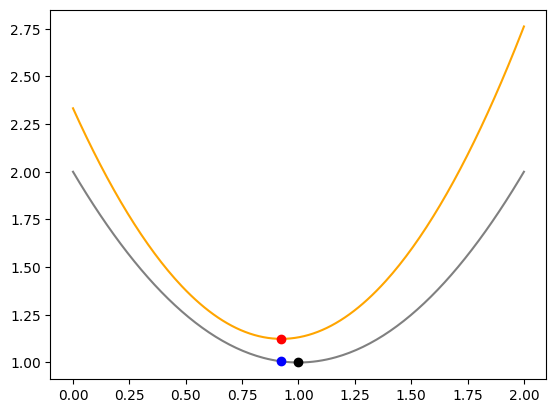

In [7]:
#plot
plt.plot(a_seq, empirical_risk_seq, c="orange")
plt.plot(a_seq, population_risk_seq, c = "gray")
plt.plot(a0, population_risk(a0, sigma), "o", c = "black")
plt.plot(a_hat, empirical_risk(a_hat, x, y), 'o', c = "red")
plt.plot(a_hat,population_risk(a_hat, sigma), 'o', c = "blue")
plt.show()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [8]:
# excess risk
population_risk(a_hat, sigma) - population_risk(a0, sigma)

0.005743256391978591

In [9]:
# simulations with fixed sample size
L = 200
excess_risk_seq = np.zeros(L)
for i in range(L):
    x = np.random.normal(0, 1, n)
    eps = np.random.normal(0, sigma, n)
    y = a0*x + eps
    mod = LinearRegression()
    mod.fit(x.reshape(-1,1), y)
    a_hat = mod.coef_[0]
    excess_risk_seq[i] = population_risk(a_hat, sigma) - population_risk(a0, sigma)

np.mean(excess_risk_seq)


0.025318576993999926

In [12]:
# simulations for various sample sizes
n_seq = range(0,10000,50)

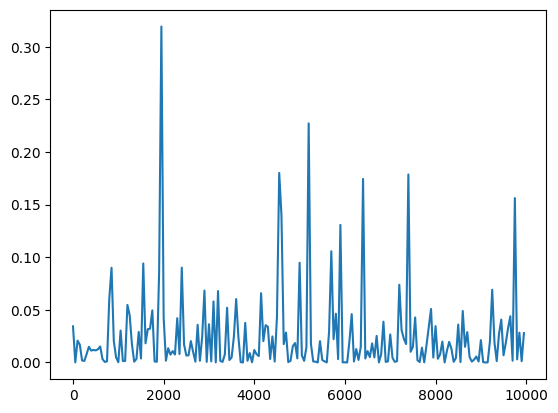

In [13]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)
plt.plot(n_seq,excess_risk_seq)
# plt.hlines(0, 25, 1000, color = "black")
plt.show()

In [14]:
np.mean(excess_risk)

0.006042410165356543

In [15]:
mean_excess_risk = []
for i in range(100,10000,500):
    excess_risk = []
    for i in range(L):
        x = np.random.normal(0, 1, L)
        eps = np.random.normal(0, sigma, L)
        y = a0*x + eps
        mod = LinearRegression()
        mod.fit(x.reshape(-1,1), y)
        a_hat = mod.coef_[0]
        excess_risk.append(population_risk(a_hat, sigma) - population_risk(a0, sigma))
    mean_excess_risk.append(np.mean(excess_risk))

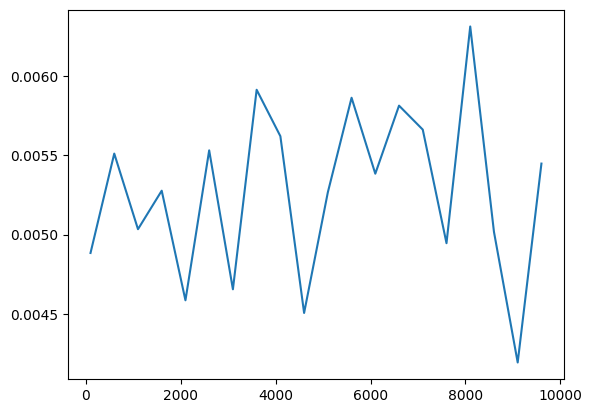

In [16]:
plt_seq = range(100, 10000, 500)
plt.plot(plt_seq, mean_excess_risk)